### Reading in data and assessing what sort of information we can get from it

In [1]:
# !pip install sodapy
# !pip install geopandas
# !pip install folium
# !pip install mapclassify

In [2]:
import warnings
warnings.filterwarnings('ignore') 

### Imports

In [3]:
# For importing the data and using API
from sodapy import Socrata
from urllib.request import urlopen
import os
import zipfile as zf
import requests
from io import BytesIO 

# Working with the data
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, mapping, Point
#from sklearn.preprocessing import LabelEncoder
import json

# Creating Visualisations
# import plotly.graph_objs as go
# import plotly.express as px
# Visualisation
import matplotlib.pylab as plt
import folium
#from IPython.core.display import display
from IPython.display import IFrame, display, HTML
from folium import plugins
from folium.plugins import HeatMap
from folium import GeoJson
import mapclassify
import seaborn as sns
import branca.colormap as cm

#### COM Population Dataset
https://data.melbourne.vic.gov.au/resource/sp4r-xphj.json

In [4]:
domain = "data.melbourne.vic.gov.au"
data_file = 'sp4r-xphj'

In [5]:
apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous app token
client = Socrata(domain, apptoken) 

##### View the Population dataset head sample

In [6]:
population_data = pd.DataFrame.from_dict(client.get_all(data_file))
print(population_data.shape)
population_data.head()

(17052, 5)


geography  year  gender      age value
0  City of Melbourne  2021  Female  Age 0-4  1943
1  City of Melbourne  2022  Female  Age 0-4  2212
2  City of Melbourne  2023  Female  Age 0-4  2477
3  City of Melbourne  2024  Female  Age 0-4  2818
4  City of Melbourne  2025  Female  Age 0-4  3206

In [7]:
population_data.loc[population_data['geography'] == 'Melbourne (Remainder)']
# population_data.where(population_data['geography']=='Melbourne (Remainder)')

geography  year          gender               age value
4536   Melbourne (Remainder)  2021          Female           Age 0-4    38
4537   Melbourne (Remainder)  2022          Female           Age 0-4    42
4538   Melbourne (Remainder)  2023          Female           Age 0-4    46
4539   Melbourne (Remainder)  2024          Female           Age 0-4    51
4540   Melbourne (Remainder)  2025          Female           Age 0-4    59
...                      ...   ...             ...               ...   ...
16900  Melbourne (Remainder)  2037  Not applicable  Total population  4741
16901  Melbourne (Remainder)  2038  Not applicable  Total population  4739
16902  Melbourne (Remainder)  2039  Not applicable  Total population  4742
16903  Melbourne (Remainder)  2040  Not applicable  Total population  4760
16904  Melbourne (Remainder)  2041  Not applicable  Total population  4765

[1218 rows x 5 columns]

### Visualise the Population Dataset

In [8]:
population_data.head()

geography  year  gender      age value
0  City of Melbourne  2021  Female  Age 0-4  1943
1  City of Melbourne  2022  Female  Age 0-4  2212
2  City of Melbourne  2023  Female  Age 0-4  2477
3  City of Melbourne  2024  Female  Age 0-4  2818
4  City of Melbourne  2025  Female  Age 0-4  3206

In [9]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   geography  17052 non-null  object
 1   year       17052 non-null  object
 2   gender     17052 non-null  object
 3   age        17052 non-null  object
 4   value      16989 non-null  object
dtypes: object(5)
memory usage: 666.2+ KB


In [10]:
population_data['age'].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85+', 'Average age',
       'Total population'], dtype=object)

In [11]:
pop_data_reset = population_data.reset_index()
subs = pop_data_reset['geography'].unique()
subs = np.delete(subs, np.where(subs =='City of Melbourne')[0])
subs = np.delete(subs, np.where(subs =='West Melbourne (Industrial)')[0])
subs = np.delete(subs, np.where(subs =='Port Melbourne')[0])
subs_df = pd.DataFrame(subs, columns = ['suburb'])
subs

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'South Yarra', 'Southbank',
       'West Melbourne (Residential)'], dtype=object)

In [12]:
subs

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'South Yarra', 'Southbank',
       'West Melbourne (Residential)'], dtype=object)

In [13]:
ages = population_data['age'].unique()
ages = np.delete(ages, np.where(ages =='Average age')[0])
ages = np.delete(ages, np.where(ages =='Total population')[0])

In [14]:
years = population_data['year'].unique()[::5]

for year in years:
#     print(year)
    data = []
    for sub in subs:
#         print(sub)
        for age in ages:
            print(age)
        data.extend([np.where((population_data['geography']==sub)&(population_data['year']==year)&(population_data['age']=='Total population'))][0][0])
    subs_df[year] = (population_data['value'].iloc[data]).astype(int).tolist()

subs_df

Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 

suburb   2021   2026   2031   2036   2041
0                        Carlton  17185  20743  26375  33358  35877
1                      Docklands  15926  19996  25292  28782  32431
2                 East Melbourne   4968   6203   7444   7949   8032
3                     Kensington  10933  12939  15847  17092  17654
4                Melbourne (CBD)  43825  55423  70552  80513  89239
5          Melbourne (Remainder)   3121   3758   4429   4725   4765
6                North Melbourne  15653  19379  25304  31192  38469
7                      Parkville   7813   9339  11223  12304  12905
8                    South Yarra   3716   4614   5467   5789   5780
9                      Southbank  22589  28428  35553  40241  44605
10  West Melbourne (Residential)   7935   9745  12716  14832  14814

[]

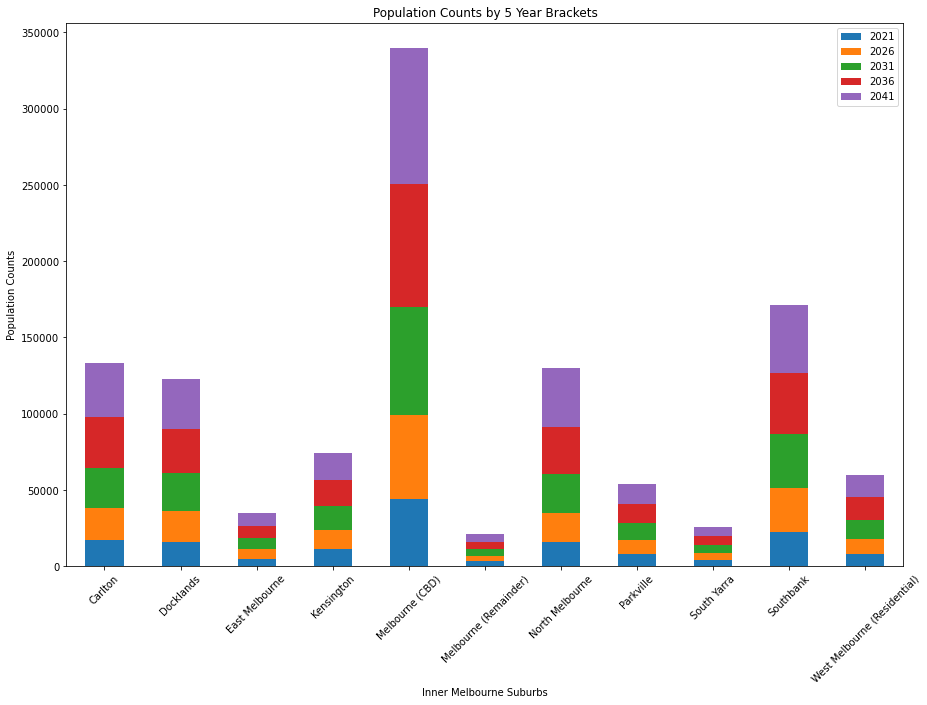

In [15]:
# ax = subs_df.plot(figsize = (15,10))
# # # ax.set_xticks(subs_df.index)
# ax.set_xticklabels(subs_df.suburb, rotation=90)
# plt.title('Population Counts by 5 Year Brackets')
# plt.ylabel('Population Counts')
# plt.xlabel('Inner Melbourne Suburbs')
# ax.plot()


# plt.bar(subs_df.suburb, subs_df['2020'])
# plt.bar(subs_df.suburb, subs_df['2025'], bottom=subs_df['2020'])
# plt.bar(subs_df.suburb, subs_df['2030'], bottom=subs_df['2020']+subs_df['2025'], color='y')
# plt.show()

ax = subs_df.plot(x= 'suburb',kind='bar', stacked=True,figsize = (15,10))
plt.style.use('seaborn-colorblind')
ax.set_xticklabels(subs_df.suburb, rotation=45)
plt.title('Population Counts by 5 Year Brackets')
plt.ylabel('Population Counts')
plt.xlabel('Inner Melbourne Suburbs')
ax.plot()

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [17]:
population_data.head()

geography  year  gender      age value
0  City of Melbourne  2021  Female  Age 0-4  1943
1  City of Melbourne  2022  Female  Age 0-4  2212
2  City of Melbourne  2023  Female  Age 0-4  2477
3  City of Melbourne  2024  Female  Age 0-4  2818
4  City of Melbourne  2025  Female  Age 0-4  3206

In [18]:
def pop_data_by_year(dataset, year):
    """
    Filters and cleans the Population dataset returning a new pandas dataframe focused on the year passed to the function.
    
    Note that the year must be between 2020 and 2040 inclusive. 
    """
    dataset = dataset.loc[dataset['age'] == 'Total population']
    # Extract the colomns of interest into "summary".
    summary = dataset[['geography', 'year', 'value']]
    # Convert datatypes and rename geography to suburb
    summary = summary.astype({'year':int, 'value':float, 'geography':str})
    summary.rename(columns={'geography':'suburb'}, inplace=True)
    # Extract the data matching the year passed from the summary.
    data = summary[summary['year'] == year]
   
    # Grouping the data by suburb while summing the population values. 
    data = pd.DataFrame(data.groupby('suburb')['value'].sum())
    data = data.reset_index()
    # Renaming the column "value" to "population_year" where year represents the year passed.
    data.rename(columns={'value':f'pop_{year}'}, inplace=True)
    
    # Cleaning the data and reset indexes
    data['suburb'] = data['suburb'].replace(['Melbourne (CBD)', 'Melbourne (Remainder)'], ['Melbourne', 'Melbourne'])
    data = pd.DataFrame(data.groupby('suburb')[f'pop_{year}'].sum())
    data = data.reset_index()
    
    # Removing unrequired data.
    subs_to_delete = ['West Melbourne (Industrial)', 'City of Melbourne', 'Port Melbourne']
    subs = [data.index[data['suburb']==sub].tolist()[0] for sub in subs_to_delete]
    data.drop(subs, inplace = True)

    data = data.reset_index(drop=True)
    data['suburb'] = data['suburb'].replace(['West Melbourne (Residential)'], ['West Melbourne'])
    
    # Sorting the data.
    data.sort_values('suburb', inplace = True)
    data = data.reset_index(drop=True)
    data['suburb'] = data['suburb'].astype(str)
    
    '''
    n.b Port melbourne Population count is very small. Melbourne (Remainder) was added to increase the numbers
    Although the actual population count should be more than 17,000, and not 2 as seen in the dataset'''
    
    return data

-------
## Splitting the above function into smaller parts

In [19]:
pop_data_22 = pop_data_by_year(population_data, 2022)
pop_data_22.head()

suburb  pop_2022
0         Carlton   17629.0
1       Docklands   16222.0
2  East Melbourne    5091.0
3      Kensington   11117.0
4       Melbourne   47782.0

In [20]:
# Prepares the population data for further analisys

def prepare_pop_data(dataset):
    """
    Filters and cleans the Population dataset returning a new pandas dataframe.
        dataset: The City of Melbourne Population Forecasts by Small Area 2021-2041. 
    """
    # Excluding the population totals 
    dataset = dataset.loc[dataset['age'] != 'Total population']
    
    # Extract the colomns of interest into "summary" and rename geography.
    summary = dataset[['geography', 'year', 'value', 'age']]
    summary.rename(columns={'geography':'suburb'}, inplace=True)
    
    # Convert datatypes and rename geography to suburb
    summary = summary.astype({'year':int, 'value':float, 'suburb':str, 'age':str})

    # Consolidating and updateing suburb names to match the Geospatial data.
    summary['suburb'] = summary['suburb'].replace(['Melbourne (CBD)', 'Melbourne (Remainder)'], ['Melbourne', 'Melbourne'])
    summary['suburb'] = summary['suburb'].replace(['West Melbourne (Residential)'], ['West Melbourne'])
    
    # Removing unrequired data.
    subs_to_delete = ['West Melbourne (Industrial)', 'City of Melbourne', 'Port Melbourne']
    subs = [summary.index[summary['suburb']==sub].tolist()[0] for sub in subs_to_delete]
    summary.drop(subs, inplace = True)
    
    # Sorting the data and resetting the inexes.
    summary.sort_values(['year', 'suburb'], inplace = True)
    summary = summary.reset_index(drop=True)
    '''
    n.b Port melbourne Population count is very small and doesn't seem to be acurate. This jumps in subsequent years skewing the data,
        for that reason we have chosen to exclude port melbourne from the analisys. 
    Melbourne (Remainder) and Melbourne (CBD) were compined to match the Geospatial data.
    '''
    
    return summary

In [21]:
test_pop = prepare_pop_data(population_data)
test_pop.head()

suburb  year  value        age
0  Carlton  2021  169.0    Age 0-4
1  Carlton  2021  180.0    Age 0-4
2  Carlton  2021  181.0    Age 5-9
3  Carlton  2021  179.0    Age 5-9
4  Carlton  2021  148.0  Age 10-14

In [22]:
test_pop_by_year = pd.DataFrame(test_pop.groupby(['suburb', 'year'])['value'].sum())
test_pop_by_year.head(40)

value
suburb            year           
Carlton           2021   34457.17
                  2022   35350.47
                  2023   35772.10
                  2024   37555.41
                  2025   40170.35
                  2026   41580.31
                  2027   43448.97
                  2028   45762.86
                  2029   48373.76
                  2030   50921.94
                  2031   52842.46
                  2032   55169.70
                  2033   57173.12
                  2034   60632.57
                  2035   64198.08
                  2036   66813.58
                  2037   69565.90
                  2038   69406.21
                  2039   69352.56
                  2040   71906.93
                  2041   71848.30
City of Melbourne 2021  305502.12
                  2022  313248.31
                  2023  316345.75
                  2024  333743.96
                  2025  357668.79
                  2026  382059.76
                  2027  404831.68
                  2028  426195.78
                  2029  446219.99
                  2030  465012.31
                  2031  482883.77
                  2032  499649.10
                  2033  515506.53
                  2034  530461.00
                  2035  544592.54
                  2036  558017.17
                  2037  570849.66
                  2038  583094.22
                  2039  594777.79

## Create dictionary for population data

In [23]:
def create_population_dict(data):
    '''Create dictionary with a datframe for all years in the dataset'''
    population = {}
    years = data['year'].unique().tolist()
    
    for year in years:
        population[int(year)] = year_data = pop_data_by_year(data, int(year))
    
    return population
    

population_layers = create_population_dict(population_data)
population_layers

{2021:             suburb  pop_2021
 0          Carlton   17185.0
 1        Docklands   15926.0
 2   East Melbourne    4968.0
 3       Kensington   10933.0
 4        Melbourne   46946.0
 5  North Melbourne   15653.0
 6        Parkville    7813.0
 7      South Yarra    3716.0
 8        Southbank   22589.0
 9   West Melbourne    7935.0,
 2022:             suburb  pop_2022
 0          Carlton   17629.0
 1        Docklands   16222.0
 2   East Melbourne    5091.0
 3       Kensington   11117.0
 4        Melbourne   47782.0
 5  North Melbourne   15938.0
 6        Parkville    7923.0
 7      South Yarra    3785.0
 8        Southbank   22999.0
 9   West Melbourne    8076.0,
 2023:             suburb  pop_2023
 0          Carlton   17840.0
 1        Docklands   16437.0
 2   East Melbourne    5145.0
 3       Kensington   11167.0
 4        Melbourne   48325.0
 5  North Melbourne   16035.0
 6        Parkville    7948.0
 7      South Yarra    3832.0
 8        Southbank   23284.0
 9   West Melbourne 

In [24]:
# Importing victorian geo data from json file.
url = (
    'https://data.gov.au/geoserver/vic-suburb-locality-boundaries-psma-administrative-boundaries/'
    + 'wfs?request=GetFeature&typeName=ckan_af33dd8c_0534_4e18_9245_fc64440f742e&outputFormat=json')
vic_suburbs = gpd.read_file(url)
vic_suburbs_reduced = vic_suburbs[['vic_loca_2', 'geometry']]
vic_suburbs_reduced.rename(columns={'vic_loca_2':'suburb'}, inplace=True)
vic_suburbs_reduced.head()

suburb                                           geometry
0  UNDERBOOL  MULTIPOLYGON (((141.74552 -35.07229, 141.74552...
1     NURRAN  MULTIPOLYGON (((148.66877 -37.39571, 148.66876...
2   WOORNDOO  MULTIPOLYGON (((142.92288 -37.97886, 142.90449...
3   DEPTFORD  MULTIPOLYGON (((147.82336 -37.66001, 147.82313...
4      YANAC  MULTIPOLYGON (((141.27978 -35.99859, 141.27989...

In [25]:
# Extract the suburbs of interest that match the population_data into "target_suburbs".
target_suburbs = population_layers[2022]['suburb'].str.upper()

# Locate the index of the target suburbs and store as a list in "subs"
subs = [vic_suburbs_reduced.index[vic_suburbs_reduced['suburb']==sub].tolist()[0] for sub in target_suburbs]

# Create a new dataframe for the melbourne suburbs "mel_suburbs" and reformat.
mel_suburbs = pd.DataFrame(vic_suburbs_reduced.iloc[subs])
mel_suburbs = mel_suburbs.reset_index(drop=True)
mel_suburbs['suburb'] = mel_suburbs['suburb'].str.title()
mel_suburbs

suburb                                           geometry
0          Carlton  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...
1        Docklands  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...
2   East Melbourne  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...
3       Kensington  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...
4        Melbourne  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...
5  North Melbourne  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...
6        Parkville  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...
7      South Yarra  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...
8        Southbank  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...
9   West Melbourne  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...

In [26]:
# Convert the DF to a GeoDF
melbourne_geo_data = gpd.GeoDataFrame(mel_suburbs) 

# Convert the GeoDF to a JSON format. 
melbourne_geo_data_json = melbourne_geo_data.to_json()
melbourne_geo_data_json[:200] # 2000 Char preview

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"suburb": "Carlton"}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[144.97400757, -37.80311047], [144'

In [27]:
# Testing inbuilt GeoPands Features 

#melbourne_geo_data.explore(melbourne_geo_data.area , legend=False)
# Hover over the suburbs Anj!! I think we add this as an interactive explore our traget suburbs, its just cool.

### Function to create layers for each year

In [28]:
# Create base map with Folium

melb_map = folium.Map(
    location=[-37.81368709240999, 144.95738102347036],
    #width=500, height=300,
    tiles='Cartodb Positron',
    zoom_start=12,
    min_zoom=10)

In [29]:
def create_map_layer(dataset, dataset_name, data_legend, col_name):
    folium.Choropleth(
        geo_data = melbourne_geo_data_json,
        name = dataset_name,
        data = dataset,
        columns = ['suburb', col_name],
        key_on='feature.properties.suburb', 
        fill_color = 'YlGn',
        fill_opacity = 0.7,
        line_opacity = 0.2,
        legend_name = data_legend,
    ).add_to(melb_map)

    folium.LayerControl().add_to(melb_map)
    
    '''The tooltips are not working...'''
#     # Add tooltips
#     folium.features.GeoJson(
#     data=dataset,
#     name=dataset_name,
#     smooth_factor=2,
#     style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['suburb',
#                 col_name
#                ],
#         aliases=["Suburb:",
#                  "Population:"
#                 ], 
#         localize=True,
#         sticky=False,
#         labels=True,
#         style="""
#             background-color: #F0EFEF;
#             border: 2px solid black;
#             border-radius: 3px;
#             box-shadow: 3px;
#         """,
#         max_width=800,),
#             highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
#         ).add_to(melb_map)  


In [30]:
def create_map_feature_group(dataset, dataset_name, data_legend, col_name, data_map):
    """Almost works..."""
    fg = folium.FeatureGroup(name=dataset_name,overlay=False).add_to(data_map)
    population =folium.Choropleth(
            geo_data = melbourne_geo_data_json,
            data = dataset,
            columns = ['suburb', col_name],  
            key_on = 'feature.properties.suburb', 
#             threshold_scale=custom_scale1, #use the custom scale we created for legend
            fill_color='YlGn',
            nan_fill_color="White", #Use white color if there is no data available for the county
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name = data_legend,
            highlight=True,
            overlay=False,
            line_color='black').geojson.add_to(fg)
    folium.LayerControl().add_to(data_map)
    return data_map

In [31]:
# Create feature groups
# fg1 = folium.FeatureGroup(name='New Covid-19 Cases Past 7 Days',overlay=False).add_to(us_map)
# fg2 = folium.FeatureGroup(name='Percent of Positive Cases Past 7 Days',overlay=False).add_to(us_map)


In [32]:
def add_population_to_map(dataframe,label, main_data, melb_map):    
    col_name = f'pop_{label}'
    
    if col_name not in main_data.columns:
        main_data = main_data.join(dataframe.set_index(["suburb"]), on=["suburb"])
    
    '''Swap these two lines to either have one layer or attempt to group layers... (one so far)'''
#     melb_map = create_map_feature_group(main_data, f'Population Density ({label})', f'Population Density',col_name, melb_map)
    create_map_layer(main_data, f'Population Density ({label})', f'Population Density',col_name)

    return main_data, melb_map

In [33]:
year = 2022
data = population_layers[year]

melbourne_geo_data, melb_map = add_population_to_map(data, year, melbourne_geo_data, melb_map)

In [34]:
# folium.TileLayer('cartodbdark_matter',overlay=True,name="View in Dark Mode").add_to(melb_map)
# folium.TileLayer('cartodbpositron',overlay=True,name="Viw in Light Mode").add_to(melb_map)
# folium.LayerControl(collapsed=False).add_to(melb_map)
# melb_map.save("index.html") 

In [35]:
melb_map 

In [36]:
# year = 2021
# data = population_layers[year]

# add_population_to_map(data, year)

In [37]:
pop_data_2030 = pop_data_by_year(population_data, 2030)
pop_data_2030 

suburb  pop_2030
0          Carlton   25414.0
1        Docklands   24372.0
2   East Melbourne    7232.0
3       Kensington   15384.0
4        Melbourne   72211.0
5  North Melbourne   24100.0
6        Parkville   10877.0
7      South Yarra    5314.0
8        Southbank   34288.0
9   West Melbourne   12205.0

In [38]:
# Different years
pop_data_22 = pop_data_by_year(population_data, 2022)

In [39]:
pop_data_22.head()

suburb  pop_2022
0         Carlton   17629.0
1       Docklands   16222.0
2  East Melbourne    5091.0
3      Kensington   11117.0
4       Melbourne   47782.0

In [40]:
# folium.Choropleth(
#     geo_data = melbourne_geo_data_json,
#     name = 'pop_22',
#     data = pop_data_22,
#     columns = ['geography', 'population'],
#     key_on='feature.properties.suburb', 
#     fill_color = 'YlGn',
#     fill_opacity = 0.7,
#     line_opacity = 0.2,
#     legend_name = 'Population Density 2022',
# ).add_to(melb_map)

# folium.LayerControl().add_to(melb_map)
# melb_map

In [41]:
pop_data_21 = pop_data_by_year(population_data, 2021)

In [42]:
# folium.Choropleth(
#     geo_data = melbourne_geo_data_json,
#     name = 'pop_21',
#     data = pop_data_21,
#     columns = ['geography', 'population'],
#     key_on='feature.properties.suburb', 
#     fill_color = 'YlGn',
#     fill_opacity = 0.7,
#     line_opacity = 0.2,
#     legend_name = 'Population Density 2021',
# ).add_to(melb_map)

# folium.LayerControl().add_to(melb_map)
# melb_map

-----

In [43]:
#returns a new GeoPandas DataFrame with the difference between the two years as a number and a percentage.
def population_diff(population_data, year_1, year_2):
    
    start_year = pop_data_by_year(population_data, year_1)
    end_year = pop_data_by_year(population_data, year_2)

    combined = start_year.merge(end_year, left_on='suburb', right_on='suburb')
    
    combined['change #'] = combined[list(end_year)[1]] - combined[list(start_year)[1]]
    combined['change %'] = (combined[list(combined)[3]] / combined[list(start_year)[1]])*100
    combined['geometry'] = mel_suburbs['geometry']
    
    return gpd.GeoDataFrame(combined)

In [44]:
pop_diff_2021_2030 = population_diff(population_data, 2021, 2030)
print(type(pop_diff_2021_2030))
print(pop_diff_2021_2030.dtypes)
pop_diff_2021_2030 

<class 'geopandas.geodataframe.GeoDataFrame'>
suburb        object
pop_2021     float64
pop_2030     float64
change #     float64
change %     float64
geometry    geometry
dtype: object


suburb  pop_2021  pop_2030  change #   change %  \
0          Carlton   17185.0   25414.0    8229.0  47.884783   
1        Docklands   15926.0   24372.0    8446.0  53.032777   
2   East Melbourne    4968.0    7232.0    2264.0  45.571659   
3       Kensington   10933.0   15384.0    4451.0  40.711607   
4        Melbourne   46946.0   72211.0   25265.0  53.817152   
5  North Melbourne   15653.0   24100.0    8447.0  53.964096   
6        Parkville    7813.0   10877.0    3064.0  39.216690   
7      South Yarra    3716.0    5314.0    1598.0  43.003229   
8        Southbank   22589.0   34288.0   11699.0  51.790695   
9   West Melbourne    7935.0   12205.0    4270.0  53.812224   

                                            geometry  
0  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...  
1  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...  
2  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...  
3  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...  
4  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...  
5  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...  
6  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...  
7  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...  
8  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...  
9  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...

In [45]:
# Simple function to return a fresh map.

def change_map_folium(population_data, layer_name, zoom):
    # Create Bse Layer 
    my_map = folium.Map(
        location=[-37.81368709240999, 144.95738102347036],
        tiles='Cartodb Positron',
        zoom_start=zoom,
        min_zoom=10)

    # Create choropleth overlay
    folium.Choropleth(
        geo_data = melbourne_geo_data_json,
        name = layer_name,
        data = population_data,
        columns = ['suburb', 'change %'], # list(population_data)[1]
        key_on='feature.properties.suburb', 
        fill_color = 'YlGn',
        fill_opacity = 0.7,
        line_opacity = 0.2,
        legend_name = f'Growth of Population {layer_name} (%)',
    ).add_to(my_map)
    
    folium.LayerControl().add_to(my_map)
    
    return my_map

In [46]:
def change_map(population_data, colour, title = "Melbourne City"): # We can remove the colour parameter, I just added it for testing colours 
    # Create a GeoPands overlay # COLOUR OPTIONS: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    geo_layer = population_data.explore(column ='change %', tiles='CartoDB positron', cmap=colour, name = title)
    folium.LayerControl().add_to(geo_layer)
    
    return geo_layer 

In [47]:
pop_change_1 = population_diff(population_data, 2021, 2025)  # Enter the two years to compare
map_2021_2025 = change_map(pop_change_1, 'winter') 

pop_change_2 = population_diff(population_data, 2025, 2030) 
map_2025_2030 = change_map(pop_change_2, 'winter')

pop_change_3 = population_diff(population_data, 2030, 2035) 
map_2030_2035 = change_map(pop_change_3, 'winter')

pop_change_4 = population_diff(population_data, 2035, 2040) 
map_2035_2040 = change_map(pop_change_4, 'winter')

pop_change_5 = population_diff(population_data, 2021, 2040) 
map_2021_2040 = change_map(pop_change_5, 'winter', 'Population Difference (2021 - 2040)')

In [48]:
def map_compare(map_1, map_2):
        htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 49%; margin: 0 auto; border: 2px solid #0f9295"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 49%; margin: 0 auto; border: 2px solid #0f9295"></iframe>'
           .format(map_1.get_root().render().replace('"', '&quot;'),400,400,
                   map_2.get_root().render().replace('"', '&quot;'),400,400))
        
        return display(htmlmap)

growth_5y_10y = map_compare(map_2021_2025, map_2025_2030)
growth_15y_20y = map_compare(map_2030_2035, map_2035_2040)

growth_5y_10y
growth_15y_20y
warnings.filterwarnings('ignore')

Insert write up about observations. 

In [49]:
#map_2020_2040

## GeoPandas Take 2

In [50]:
all_subs = gpd.read_file(url)
all_subs.head(2)

id lc_ply_pid   dt_create  \
0  ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1       6670  2011-08-31   
1  ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2       6671  2011-08-31   

  dt_retire  loc_pid  vic_locali vic_loca_1 vic_loca_2 vic_loca_3 vic_loca_4  \
0      None  VIC2615  2012-04-27       None  UNDERBOOL       None       None   
1      None  VIC1986  2012-04-27       None     NURRAN       None       None   

  vic_loca_5 vic_loca_6 vic_loca_7  \
0          G       None          2   
1          G       None          2   

                                            geometry  
0  MULTIPOLYGON (((141.74552 -35.07229, 141.74552...  
1  MULTIPOLYGON (((148.66877 -37.39571, 148.66876...

In [51]:
all_subs_df = all_subs[['vic_loca_2', 'geometry']]
all_subs_df.rename(columns={'vic_loca_2':'suburb'}, inplace=True)
all_subs_df.head()

suburb                                           geometry
0  UNDERBOOL  MULTIPOLYGON (((141.74552 -35.07229, 141.74552...
1     NURRAN  MULTIPOLYGON (((148.66877 -37.39571, 148.66876...
2   WOORNDOO  MULTIPOLYGON (((142.92288 -37.97886, 142.90449...
3   DEPTFORD  MULTIPOLYGON (((147.82336 -37.66001, 147.82313...
4      YANAC  MULTIPOLYGON (((141.27978 -35.99859, 141.27989...

In [52]:
# Extract the suburbs of interest that match the population_data into "target_suburbs".
target_subs = population_layers[2022]['suburb'].str.upper()

# Locate the index of the target suburbs and store as a list in "subs"
subs = [all_subs_df.index[all_subs_df['suburb']==sub].tolist()[0] for sub in target_subs]

#Remove unwanted rows and keep data in geo dataframe format
city_suburbs = all_subs_df.take(list(subs))
city_suburbs.reset_index(drop=True, inplace = True)
city_suburbs['suburb'] = city_suburbs['suburb'].str.title()

city_suburbs

suburb                                           geometry
0          Carlton  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...
1        Docklands  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...
2   East Melbourne  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...
3       Kensington  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...
4        Melbourne  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...
5  North Melbourne  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...
6        Parkville  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...
7      South Yarra  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...
8        Southbank  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...
9   West Melbourne  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...

In [53]:
type(city_suburbs)

geopandas.geodataframe.GeoDataFrame

In [54]:
#city_suburbs.explore()

In [55]:
city_suburbs_pop = city_suburbs.join(population_layers[2022].set_index(["suburb"]), on=["suburb"])
print(type(city_suburbs_pop))
city_suburbs_pop

<class 'geopandas.geodataframe.GeoDataFrame'>


suburb                                           geometry  \
0          Carlton  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...   
1        Docklands  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...   
2   East Melbourne  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...   
3       Kensington  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...   
4        Melbourne  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...   
5  North Melbourne  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...   
6        Parkville  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...   
7      South Yarra  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...   
8        Southbank  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...   
9   West Melbourne  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...   

   pop_2022  
0   17629.0  
1   16222.0  
2    5091.0  
3   11117.0  
4   47782.0  
5   15938.0  
6    7923.0  
7    3785.0  
8   22999.0  
9    8076.0

In [56]:
type(city_suburbs_pop)

geopandas.geodataframe.GeoDataFrame

In [57]:
#city_suburbs_pop.explore(column = 'pop_2022', name = 'Population (thousands) 2022')

In [58]:
# Save the layer view as a map layer
pop_m = city_suburbs_pop.explore(column = 'pop_2022', name = 'Population (thousands) 2022')

# Add layer control for user
folium.LayerControl().add_to(pop_m)

# display the map
pop_m

In [59]:
city_suburbs_pop = city_suburbs_pop.join(population_layers[2030].set_index(["suburb"]), on=["suburb"])
city_suburbs_pop

suburb                                           geometry  \
0          Carlton  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...   
1        Docklands  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...   
2   East Melbourne  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...   
3       Kensington  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...   
4        Melbourne  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...   
5  North Melbourne  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...   
6        Parkville  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...   
7      South Yarra  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...   
8        Southbank  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...   
9   West Melbourne  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...   

   pop_2022  pop_2030  
0   17629.0   25414.0  
1   16222.0   24372.0  
2    5091.0    7232.0  
3   11117.0   15384.0  
4   47782.0   72211.0  
5   15938.0   24100.0  
6    7923.0   10877.0  
7    3785.0    5314.0  
8   22999.0   34288.0  
9    8076.0   12205.0

In [60]:
com = city_suburbs.explore(name = 'Melbourne Cities')

city_suburbs.join(population_layers[2022].set_index(["suburb"]), on=["suburb"]).explore(m = com, column = 'pop_2022', name = 'Population (thousands) 2022')
city_suburbs.join(population_layers[2030].set_index(["suburb"]), on=["suburb"]).explore(m = com, column = 'pop_2030', name = 'Population (thousands) 2030')
city_suburbs.join(population_layers[2040].set_index(["suburb"]), on=["suburb"]).explore(m = com, column = 'pop_2040', name = 'Population (thousands) 2040')

folium.TileLayer(control=True).add_to(com)  # use folium to add alternative tiles
folium.LayerControl().add_to(com)
com

#### VicRoads Traffic Dataset

In [61]:
traffic_url = 'https://vicroadsopendata-vicroadsmaps.opendata.arcgis.com/datasets/5512df2ff41e4941bacf868053dbfba9_0.csv?outSR=%7B%22latestWkid%22%3A3111%2C%22wkid%22%3A102171%7D'

In [62]:
traffic_data = pd.read_csv(traffic_url)

In [63]:
traffic_data.head()

OBJECTID_1  OBJECTID  TIS_ID  HMGNS_FLOW_ID  HMGNS_LNK_ID  \
0           1       743   14915          14915          2006   
1           2       650   14140          14140          8786   
2           3       701   12113          12113          6035   
3           4       702   12897          12897          7079   
4           5       703    9893           9893          3475   

                                      HMGNS_LNK_DESC        LGA_SHORT_NM  \
0   MARYSVILLE-WOODS POINT ROAD btwn LAKE MOUNTAI...        YARRA RANGES   
1   STEELS CREEK ROAD btwn WILLOWBEND DRIVE & ELT...        YARRA RANGES   
2   LATROBE ROAD btwn TANJIL EAST ROAD & GORDON S...             LATROBE   
3   CASTERTON ROAD btwn GLENELG HIGHWAY & COLERAI...  SOUTHERN GRAMPIANS   
4         HUTTON ROAD btwn CHAPEL ROAD & GREENS ROAD           DANDENONG   

                      RGN_LONG_NM  ROAD_NBR             DECLARED_ROAD_NM  ...  \
0  METROPOLITAN SOUTH EAST REGION      4961  MARYSVILLE-WOODS POINT ROAD  ...   
1  METROPOLITAN SOUTH EAST REGION      9999               Not Applicable  ...   
2                  EASTERN REGION      5911  MORWELL-YALLOURN NORTH ROAD  ...   
3            SOUTH WESTERN REGION      2670              GLENELG HIGHWAY  ...   
4  METROPOLITAN SOUTH EAST REGION      5168      BRAESIDE-DANDENONG ROAD  ...   

  TWO_WAY_AADT_TRUCKS ALLVEH_AMPEAK_AADT ALLVEH_PMPEAK_AADT GROWTH_RATE  \
0                 0.0                NaN                NaN       0.013   
1                40.0                NaN                NaN       0.019   
2               160.0                NaN                NaN       0.015   
3               340.0                NaN                NaN       0.020   
4              1500.0             1000.0             1100.0       0.003   

      CI AM_PEAK_SPEED OFF_PEAK_SPEED PM_PEAK_SPEED    YR  \
0  0.005           NaN            NaN           NaN  2020   
1  0.002           NaN            NaN           NaN  2020   
2  0.009           NaN            NaN           NaN  2020   
3  0.001           NaN            NaN           NaN  2020   
4  0.002           NaN            NaN           NaN  2020   

                         LABEL  
0      24* (13% 3*) EAST BOUND  
1    373* (6% 22*) NORTH BOUND  
2  1,100* (6% 61*) NORTH BOUND  
3   801* (21% 165*) WEST BOUND  
4  12,000 (6% 744*) WEST BOUND  

[5 rows x 50 columns]

In [64]:
print(traffic_data['LGA_SHORT_NM'].unique())

['YARRA RANGES' 'LATROBE' 'SOUTHERN GRAMPIANS' 'DANDENONG' 'BRIMBANK'
 'WELLINGTON' 'WYNDHAM' 'KNOX' 'HUME' 'EAST GIPPSLAND' 'BAYSIDE' 'BENALLA'
 'MOIRA' 'NILLUMBIK' 'CASEY' 'LODDON' 'MAROONDAH' 'KINGSTON' 'GLENELG'
 'MORNINGTON PENINSULA' 'MANNINGHAM' 'DAREBIN' 'CORANGAMITE' 'SURF COAST'
 'TOWONG' 'WEST WIMMERA' 'BENDIGO' 'GEELONG' 'BASS COAST'
 '(MOUNT STIRLING)' 'MOYNE' 'QUEENSCLIFFE' 'BAW BAW' 'BALLARAT'
 'CENTRAL GOLDFIELDS' 'FRANKSTON' 'PYRENEES' 'WHITTLESEA' 'MARIBYRNONG'
 'INDIGO' 'MOUNT ALEXANDER' 'MELBOURNE' 'BANYULE' 'SOUTH GIPPSLAND'
 'STONNINGTON' 'GOLDEN PLAINS' 'SHEPPARTON' 'MORELAND' 'BOROONDARA'
 'NORTHERN GRAMPIANS' 'YARRA' 'ALPINE' 'WHITEHORSE' 'COLAC OTWAY'
 'WANGARATTA' 'MACEDON RANGES' 'ARARAT' 'HORSHAM' 'WODONGA' 'HOBSONS BAY'
 'CARDINIA' 'MILDURA' 'PORT PHILLIP' 'MOORABOOL' 'BULOKE' 'MITCHELL'
 'MURRINDINDI' 'MONASH' 'HINDMARSH' 'MELTON' 'MOONEE VALLEY' 'WARRNAMBOOL'
 'YARRIAMBIACK' 'MANSFIELD' 'GLEN EIRA' 'GANNAWARRA' 'CAMPASPE'
 'SWAN HILL' 'STRATHBOGIE' 'HEPB

In [65]:
melb_traffic = traffic_data.where(traffic_data['LGA_SHORT_NM']=='MELBOURNE')

In [66]:
melb_traffic['LGA_SHORT_NM'].unique()

array([nan, 'MELBOURNE'], dtype=object)

In [67]:
melb_traffic.dropna(subset = ['LGA_SHORT_NM'], inplace = True)
melb_traffic

OBJECTID_1  OBJECTID   TIS_ID  HMGNS_FLOW_ID  HMGNS_LNK_ID  \
95           96.0    1288.0     53.0           53.0        3458.0   
104         105.0    1297.0    615.0          615.0        4654.0   
134         135.0    1406.0   1092.0         1092.0        1555.0   
156         157.0    1311.0   1359.0         1359.0        2886.0   
160         161.0    1315.0   2266.0         2266.0        2919.0   
...           ...       ...      ...            ...           ...   
14548     14549.0   15159.0  15242.0        15242.0        2474.0   
14549     14550.0   15160.0  15868.0        15868.0        2477.0   
14570     14571.0   33578.0   6447.0         6447.0        8561.0   
14589     14590.0   15446.0  13346.0        13346.0        7409.0   
14612     14613.0   15770.0  14498.0        14498.0        2160.0   

                                          HMGNS_LNK_DESC LGA_SHORT_NM  \
95      FOOTSCRAY ROAD btwn WESTERN LINK TOLLWAY Onra...    MELBOURNE   
104     CITY ROAD btwn ALEXANDRA AVENUE & SOUTHBANK B...    MELBOURNE   
134     WESTERN LINK TOLLWAY btwn WESTERN LINK TOLLWA...    MELBOURNE   
156     HARKER STREET btwn FLEMINGTON ROAD & ERROL ST...    MELBOURNE   
160        DYNON ROAD btwn DOCK LINK ROAD & LLOYD STREET    MELBOURNE   
...                                                  ...          ...   
14548   FLINDERS STREET btwn ELIZABETH STREET & ST KI...    MELBOURNE   
14549   ELIZABETH STREET btwn COLLINS STREET & BOURKE...    MELBOURNE   
14570   POWER STREET btwn WEST GATE FREEWAY & SOUTHER...    MELBOURNE   
14589   BOURKE STREET btwn SWANSTON STREET WALK & RUS...    MELBOURNE   
14612   MONTAGUE ST SE BD BTWN WEST GATE FWY & WEST G...    MELBOURNE   

                          RGN_LONG_NM  ROAD_NBR      DECLARED_ROAD_NM  ...  \
95     METROPOLITAN NORTH WEST REGION    2120.0     DOCKLANDS HIGHWAY  ...   
104    METROPOLITAN NORTH WEST REGION    2240.0    YARRA BANK HIGHWAY  ...   
134    METROPOLITAN NORTH WEST REGION    2999.0  WESTERN LINK TOLLWAY  ...   
156    METROPOLITAN NORTH WEST REGION    5026.0         HARKER STREET  ...   
160    METROPOLITAN NORTH WEST REGION    5035.0            DYNON ROAD  ...   
...                               ...       ...                   ...  ...   
14548  METROPOLITAN NORTH WEST REGION    9999.0        Not Applicable  ...   
14549  METROPOLITAN NORTH WEST REGION    9999.0        Not Applicable  ...   
14570  METROPOLITAN NORTH WEST REGION    8040.0           7824F 2240F  ...   
14589  METROPOLITAN NORTH WEST REGION    9999.0        Not Applicable  ...   
14612  METROPOLITAN NORTH WEST REGION    2120.0     DOCKLANDS HIGHWAY  ...   

      TWO_WAY_AADT_TRUCKS ALLVEH_AMPEAK_AADT ALLVEH_PMPEAK_AADT GROWTH_RATE  \
95                 1700.0                NaN                NaN      -0.001   
104                1400.0                NaN                NaN       0.002   
134               14000.0                NaN                NaN       0.026   
156                 720.0                NaN                NaN       0.014   
160                3300.0                NaN                NaN       0.003   
...                   ...                ...                ...         ...   
14548              1200.0                NaN                NaN      -0.014   
14549               540.0                NaN                NaN      -0.007   
14570               760.0                NaN                NaN       0.022   
14589                 NaN                NaN                NaN      -0.012   
14612              2700.0             1800.0             1000.0      -0.001   

          CI AM_PEAK_SPEED OFF_PEAK_SPEED PM_PEAK_SPEED      YR  \
95     0.001           NaN            NaN           NaN  2020.0   
104    0.002           NaN            NaN           NaN  2020.0   
134    0.003           NaN            NaN           NaN  2020.0   
156    0.003           NaN            NaN           NaN  2020.0   
160    0.005           NaN            NaN           NaN  2020.0   
...      ... 

In [68]:
list(melb_traffic.columns)

['OBJECTID_1',
 'OBJECTID',
 'TIS_ID',
 'HMGNS_FLOW_ID',
 'HMGNS_LNK_ID',
 'HMGNS_LNK_DESC',
 'LGA_SHORT_NM',
 'RGN_LONG_NM',
 'ROAD_NBR',
 'DECLARED_ROAD_NM',
 'LOCAL_ROAD_NM',
 'ALT_ROAD_NM',
 'RMA_CLSFCN_CD',
 'RMA_CLSFCN_GROUP',
 'RMA_DESC',
 'SRNS',
 'SRNS_CD',
 'SRNS_DESC',
 'RMC',
 'FLOW',
 'HMGNS_FLOW_LENGTH',
 'ALLVEHS_MMW',
 'ALLVEH_CALC',
 'ALLVEHS_AADT',
 'BUSES_MMW',
 'BUSES_AADT',
 'TRAMS_MMW',
 'TRAMS_AADT',
 'MOTORCYCLES_MMW',
 'MOTORCYCLES_AADT',
 'MOTORCYCLE_CALC',
 'TRUCKS_MMW',
 'TRUCKS_AADT',
 'TRUCK_CALC',
 'PER_TRUCKS_AADT',
 'EHV',
 'PER_HV',
 'PER_LV',
 'ESA',
 'TWO_WAY_AADT',
 'TWO_WAY_AADT_TRUCKS',
 'ALLVEH_AMPEAK_AADT',
 'ALLVEH_PMPEAK_AADT',
 'GROWTH_RATE',
 'CI',
 'AM_PEAK_SPEED',
 'OFF_PEAK_SPEED',
 'PM_PEAK_SPEED',
 'YR',
 'LABEL']

In [69]:
melb_traffic.iloc[0]#['HMGNS_LNK_DESC']

OBJECTID_1                                                            96
OBJECTID                                                            1288
TIS_ID                                                                53
HMGNS_FLOW_ID                                                         53
HMGNS_LNK_ID                                                        3458
HMGNS_LNK_DESC          FOOTSCRAY ROAD btwn WESTERN LINK TOLLWAY Onra...
LGA_SHORT_NM                                                   MELBOURNE
RGN_LONG_NM                               METROPOLITAN NORTH WEST REGION
ROAD_NBR                                                            2120
DECLARED_ROAD_NM                                       DOCKLANDS HIGHWAY
LOCAL_ROAD_NM                                             FOOTSCRAY ROAD
ALT_ROAD_NM                                               Not Applicable
RMA_CLSFCN_CD                                                         AH
RMA_CLSFCN_GROUP                                   

### Bus Stops 

In [70]:
# https://dev.socrata.com/foundry/data.melbourne.vic.gov.au/vzsu-xnf6

apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous App Token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken)           # Open Dataset Connection
bus_data_unique_identifier = 'vzsu-xnf6'   

bus_stop_data = gpd.GeoDataFrame.from_dict(client.get_all(bus_data_unique_identifier))

In [71]:
bus_stop_data.head(2) 

the_geom objectid   mcc_id  \
0  {'type': 'Point', 'coordinates': [144.92185552...      303  1581210   
1  {'type': 'Point', 'coordinates': [144.93239283...      355  1235255   

    str_id asset_clas               asset_type asset_subt  \
0  1581210    Signage  Sign - Public Transport              
1  1235255    Signage  Sign - Public Transport              

                                         descriptio model_no  \
0   Sign - Public Transport 1 Panel Bus Stop Type 8     P.16   
1  Sign - Public Transport 1 Panel Bus Stop Type 13     P.16   

                        model_desc prop_id roadseg_id addresspt_   addresspt1  \
0  Sign - Public Transport 1 Panel       0      23147          0          0.0   
1  Sign - Public Transport 1 Panel       0      21673     570648  76.81982435   

  addressp_1  
0          0  
1        357

In [72]:
# bus_stop_data.rename(columns={'the_geom':'geometry'}, inplace=True)
# bus_stop_data.head(1) 

### Tram Tracks Dataset 

In [73]:
# https://data.melbourne.vic.gov.au/Transport/Tram-tracks/wqka-kyhz

apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous App Token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken)           # Open Dataset Connection
tram_data_unique_identifier = 'au2t-98pn'   

tram_track_data = gpd.GeoDataFrame.from_dict(client.get_all(tram_data_unique_identifier))

In [74]:
#tram_track_data.rename(columns={'the_geom':'geometry'}, inplace=True)
tram_track_data.head()

the_geom   name  \
0  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_1   
1  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_2   
2  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_3   
3  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_4   
4  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_5   

                                          descriptio  
0  <center><table><tr><th colspan='2' align='cent...  
1  <center><table><tr><th colspan='2' align='cent...  
2  <center><table><tr><th colspan='2' align='cent...  
3  <center><table><tr><th colspan='2' align='cent...  
4  <center><table><tr><th colspan='2' align='cent...

In [75]:

# Functions for converting GeoJSON datasets into GeoPandas Formats. 
def get_coords(row):
    """
    Converts the geometry column entries of the datafile row into shapely polygons.
    row: a single row entry for a dataframe  
    Code Snippit from: Ideal Green Roof Locations: Melbourne 
    """
    row["geometry"] = Polygon(row['geometry']['coordinates'][0][0])

    return row


def convert_dataset(dataframe):
    """
    Converts the downloaded GeoJSON dataset into a usable Geopandas format
    using the 4326 coordinate system.
    """
    # Rename the column to be recognisable to geopandas
    new_dataframe = dataframe.rename(columns={"the_geom" : "geometry"})

    # Apply the get_coords method to each row
    new_dataframe.apply(get_coords, axis=1)

    return gpd.GeoDataFrame(new_dataframe, geometry='geometry', crs=4326)

In [76]:
tram_track_data_gpd = convert_dataset(tram_track_data)

In [77]:
tram_track_data_gpd.explore()

In [78]:

# Save the layer view as a map layer
# tram_tracks_map = tram_track_data_gpd.explore(tiles='CartoDB positron', name = 'Tram Tracks', color='green')
# folium.LayerControl().add_to(tram_tracks_map)
# tram_tracks_map

In [79]:
def draw_tram_map(tramlines, melbourne_city):
    #Create city map
    m =  melbourne_city.explore(name = 'Melbourne City Suburbs',color= '#22e4ac')
    
    style = {'fillColor': '#056b8a', 'color': '#056b8a'}
    folium.GeoJson(
        tramlines,
        name='Tram Lines',            
        style_function=lambda x:style,
#             tooltip=folium.features.GeoJsonTooltip(fields=['name','direction','type','notes'])
        ).add_to(m)
    
    folium.LayerControl().add_to(m)
    return m

In [80]:
tram_track_data_gpd = convert_dataset(tram_track_data)

tram_map = draw_tram_map(tram_track_data_gpd, city_suburbs)

In [81]:
tram_map

## Combine Bike Path & bike counts Datasets into one eploration

In [82]:
apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous App Token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken)           # Open Dataset Connection

In [83]:
bike_data_unique_identifier = 'hmuz-nz6m' 
Tuesday_data = 'uyp8-7ii8'

In [84]:
def get_bike_data(bikecounts, bikepaths):
    # Bike paths
    bike_geo_data_url = 'https://'+ domain +'/api/geospatial/'+ bikepaths +'?method=export&format=GeoJSON'
    with urlopen(bike_geo_data_url) as result:
        bike_route_data = json.load(result)
    
    # Bike Counts
    bikecountdf =  pd.DataFrame.from_dict(client.get_all(bikecounts))
    bikecountdf =  gpd.GeoDataFrame(bikecountdf[['latitude','longitude','total','year', 'description']])
    bikecountdf.dropna(inplace=True)   

    # Covert year column to int
    years = [int(x) for x in bikecountdf['year'].unique()]

    #get latest poll data
    bikecountdf = bikecountdf.loc[bikecountdf['year'] == str(max(years))]
        
    degs = ['latitude','longitude']
    for col in degs:
        bikecountdf[col] = bikecountdf[col].astype(float)
    bikecountdf['total'] = bikecountdf['total'].astype(int)
    bikecountdf.reset_index(drop=True, inplace = True)
    df_geometry = [Point(xy) for xy in zip(bikecountdf['latitude'], bikecountdf['longitude'])]
    bikecountdf = gpd.GeoDataFrame(bikecountdf, crs = 4326, geometry = df_geometry)
    
    return bikecountdf, bike_route_data

In [85]:
def create_map_layer_with_path_features(bike_routes):
    
    # Get various bike path routes
    bike_paths_types = []
    for feature in bike_routes['features']:
        r_type = feature['properties']['type']
        if bike_paths_types.count(r_type) == 0:
            bike_paths_types.append(feature['properties']['type'])
    
    colours = ['#056b8a', '#14a38e', '#2af598', '#08b3e5', '#08af64'] 
    
    routes = []
    for i, route_type in enumerate(bike_paths_types):
        route_json = bike_routes.copy()
        route_json['features'] = [path for path in route_json['features'] if path['properties']['type'] == route_type]
        
        # Add colour property to dataset
        for data in route_json['features']:
            data['properties']['__colour'] = colours[i]
        
        g = folium.GeoJson(
                    route_json,
                    name=f'{route_type}',            
                    style_function=lambda x:{
                        "color": x["properties"]["__colour"],
                        "fillColor": x["properties"]["__colour"],},
                    tooltip=folium.features.GeoJsonTooltip(fields=['name','direction','type','notes'])
                    )
        
        routes.extend([g])
    return routes
    

In [86]:
def draw_heatMap(data, bikepath = None, heat_m = False, colour = 'blue'):
    
    if type(heat_m) != bool :
#         style_kwds=dict(color="black",weight=1, opacity=0.4, fillOpacity=.7)
        m =  heat_m.explore(name = 'Melbourne City Suburbs',style_kwds = dict(color= '#22e4ac', fillOpacity = 0.4, opacity = 0.4)) # Can't quite work out the "scheme" for colours
    else:
        m = folium.Map(location = (-37.81368709240999, 144.95738102347036), zoom_start=13,min_zoom=10)

    # Add bike routes to map layers   
    bike_routes = create_map_layer_with_path_features(bikepath)
    for r in bike_routes:
        r.add_to(m)
        
    # Bike counts
    labels = data['description']
    data = list(map(list, zip(data['latitude'], data['longitude'],data['total'])))        
    HeatMap(data, name='Bike Counts').add_to(m)
    for i, loc in enumerate(data):
        folium.Marker(location=[loc[0], loc[1]],
                      popup=f'<strong>{labels[i]}</strong>',
                      tooltip=f'Bike Count: {loc[2]}',
                      icon = folium.DivIcon(html =f"""<div style="color: {colour};">  </div>""")
                     ).add_to(m)
    folium.LayerControl().add_to(m)
    return m

In [87]:
super_tuesday, bike_paths = get_bike_data(Tuesday_data,bike_data_unique_identifier)

super_tuesday.keys()

bike_map = draw_heatMap(super_tuesday,bike_paths, city_suburbs, colour = 'green')

bike_map

In [88]:

bike_paths['features'][0]['properties'].keys()
#bike_paths['features'][0]['properties']['type']

dict_keys(['name', 'direction', 'info', 'status', 'notes', 'type', '__colour'])

In [89]:
bike_paths_types = []

for route in bike_paths['features']:
#     print(route)
    r_type = route['properties']['type']
    if bike_paths_types.count(r_type)==0:
        bike_paths_types.append(route['properties']['type'])

bike_paths_types 

['On-Road Bike Lane', 'Off-Road Bike Route', 'Informal Bike Route', 'Corridor']

In [90]:
# Creating a function to seperate bike paths by type. Out of time today Anj, 
# I'll pick this up tomorrow if you don't finish it tonight.

on_road_path = []
off_road_path = []
informal_path = []
corridor = []

for route in bike_paths['features']:
    if route['properties']['type'] == 'On-Road Bike Lane':
        on_road_path.append(route)
    elif route['properties']['type'] == 'Off-Road Bike Route':
        off_road_path.append(route)
    elif route['properties']['type'] == 'Informal Bike Route':
        informal_path.append(route)
    else:
        corridor.append(route)
        

print(f'On Road: {len(on_road_path)}\nOff Road: {len(off_road_path)}\nInformal Path: {len(informal_path)}\nCorridor: {len(corridor)}')

On Road: 140
Off Road: 93
Informal Path: 37
Corridor: 4


In [91]:
bike_paths.keys()

dict_keys(['type', 'features'])

In [92]:
bike_paths['features'][0]['properties'].keys()

dict_keys(['name', 'direction', 'info', 'status', 'notes', 'type', '__colour'])

In [93]:
bike_map # This is better without the markers. It's too crowded otherwise. 
# Also, how about we colour the on-road V off-road bike paths a different colour. 
# The goal here is evaluate the hotspots.
    # Are they hot because of the infrastraucture provided or should we be prioritising safe bikeways here.
''' I had the markers so that you know what the hot spots actually were...
    Im easy, whatever suits.'''

' I had the markers so that you know what the hot spots actually were...\n    Im easy, whatever suits.'

### Bike Route Data

In [94]:
apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous App Token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken)           # Open Dataset Connection
bike_data_unique_identifier = 'hmuz-nz6m'   

# bike_route_data = gpd.GeoDataFrame.from_dict(client.get_all(bike_data_unique_identifier))

bike_geo_data_url = 'https://'+ domain +'/api/geospatial/'+ bike_data_unique_identifier +'?method=export&format=GeoJSON'
with urlopen(bike_geo_data_url) as result:
    bike_route_data = json.load(result)

bike_route_data.keys()

dict_keys(['type', 'features'])

In [95]:
bike_route_data['features'][0]['properties'].keys()

dict_keys(['name', 'direction', 'info', 'status', 'notes', 'type'])

In [96]:
# Create Base Layer
m = folium.Map(
    location=[-37.81368709240999, 144.95738102347036],
    tiles='Cartodb Positron',
    zoom_start=13,
    min_zoom=10)
folium.GeoJson(
    bike_route_data,
    name='Bike Routes',
    tooltip=folium.features.GeoJsonTooltip(fields=['name','direction','type','notes'])
    ).add_to(m)
folium.LayerControl().add_to(m)

m

#### VicRoads Transportation Accidents Dataset

In [97]:
# This url is for a zip file which contains multiple csv files
crash_url = 'https://vicroadsopendatastorehouse.vicroads.vic.gov.au/opendata/Road_Safety/ACCIDENT.zip'

In [98]:
crash_request = requests.get(crash_url)

Read the zip file and view filename contents

In [99]:
crash_files = zf.ZipFile(BytesIO(crash_request.content))
print(crash_files.namelist())

['ACCIDENT.csv', 'ACCIDENT_CHAINAGE.csv', 'ACCIDENT_EVENT.csv', 'ACCIDENT_LOCATION.csv', 'ATMOSPHERIC_COND.csv', 'NODE.csv', 'NODE_ID_COMPLEX_INT_ID.csv', 'PERSON.csv', 'ROAD_SURFACE_COND.csv', 'Statistic Checks.csv', 'SUBDCA.csv', 'VEHICLE.csv']


Save the 'ACCIDENT.csv' file to a temp folder and load into a dataframe

In [100]:
accident = crash_files.extract('ACCIDENT.csv', 'temp')
accident = pd.read_csv(accident, low_memory=False)
accident.head()

ACCIDENT_NO ACCIDENTDATE                    ACCIDENTTIME  ACCIDENT_TYPE  \
0  T20060000010   13/01/2006  12:42:00                                    1   
1  T20060000018   13/01/2006  19:10:00                                    1   
2  T20060000022   14/01/2006  12:10:00                                    7   
3  T20060000023   14/01/2006  11:49:00                                    1   
4  T20060000026   14/01/2006  10:45:00                                    1   

               Accident Type Desc  DAY_OF_WEEK Day Week Description  DCA_CODE  \
0          Collision with vehicle            6               Friday       113   
1          Collision with vehicle            6               Friday       113   
2  Fall from or in moving vehicle            7             Saturday       190   
3          Collision with vehicle            7             Saturday       130   
4          Collision with vehicle            7             Saturday       121   

                                  DCA Description DIRECTORY  ... NO_PERSONS  \
0  RIGHT NEAR (INTERSECTIONS ONLY)                      MEL  ...          6   
1  RIGHT NEAR (INTERSECTIONS ONLY)                      MEL  ...          4   
2        FELL IN/FROM VEHICLE                           MEL  ...          2   
3  REAR END(VEHICLES IN SAME LANE)                      MEL  ...          2   
4           RIGHT THROUGH                               MEL  ...          3   

  NO_PERSONS_INJ_2 NO_PERSONS_INJ_3 NO_PERSONS_KILLED  NO_PERSONS_NOT_INJ  \
0                0                1                 0                   5   
1                0                1                 0                   3   
2                1                0                 0                   1   
3                1                0                 0                   1   
4                0                3                 0                   0   

  POLICE_ATTEND  ROAD_GEOMETRY   Road Geometry Desc  SEVERITY  SPEED_ZONE  
0             1              1   Cross intersection         3          60  
1             1              2       T intersection         3          70  
2             1              5  Not at intersection         2         100  
3             1              2       T intersection         2          80  
4             1              5  Not at intersection         3          50  

[5 rows x 28 columns]

### Super Tuesday / Super Sunday Bike useage Data

In [101]:
def get_bike_data(datafile):
    df =  pd.DataFrame.from_dict(client.get_all(datafile))
    df =  gpd.GeoDataFrame(df[['latitude','longitude','total','year', 'description']])
    df.dropna(inplace=True)
    

    # Covert year column to int
    years = [int(x) for x in df['year'].unique()]

    #get latest poll data
    df = df.loc[df['year'] == str(max(years))]
        
    degs = ['latitude','longitude']
    for col in degs:
        df[col] = df[col].astype(float)
    df['total'] = df['total'].astype(int)
    df.reset_index(drop=True, inplace = True)
    df_geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])]
    df = gpd.GeoDataFrame(df, crs = 4326, geometry = df_geometry)
    return df

In [102]:
def draw_heatMap(data, heat_m = None, bikepath = None, colour = 'blue'):
    labels = data['description']
    if heat_m == None:
        m = folium.Map(location = (-37.81368709240999, 144.95738102347036), zoom_start=13,min_zoom=10)
    
    if bikepath != None:
        folium.GeoJson(
            bikepath,
            name='Bike Routes',
            tooltip=folium.features.GeoJsonTooltip(fields=['name','direction','type','notes'])
            ).add_to(m)
        
    data = list(map(list, zip(data['latitude'], data['longitude'],data['total'])))        
    HeatMap(data).add_to(m)
    for i, loc in enumerate(data):
        folium.Marker(location=[loc[0], loc[1]],
                      popup=f'<strong>{labels[i]}</strong>',
                      tooltip=f'Bike Count: {loc[2]}',
                      icon = folium.DivIcon(html =f"""<div style="color: {colour};">  </div>""")
                     ).add_to(m)
    folium.LayerControl().add_to(m)
    return m


#### Tuesday - Weekday

In [103]:
# Getting the data

super_tuesday = get_bike_data('uyp8-7ii8')
print(super_tuesday.shape)
super_tuesday.head(3)

(46, 6)


latitude   longitude  total  year  \
0 -37.825963  144.960053    249  2017   
1 -37.787979  144.959000   1425  2017   
2 -37.793993  144.941956     42  2017   

                                         description  \
0  Queens Bridge St [N], City Rd [NE], Morray St ...   
1  Royal Pde/shared path [N], Royal Pde/shared pa...   
2        Melrose St [N], Melrose St [S], Mark St [W]   

                      geometry  
0  POINT (-37.82596 144.96005)  
1  POINT (-37.78798 144.95900)  
2  POINT (-37.79399 144.94196)

In [104]:
draw_heatMap(super_tuesday, bikepath = bike_route_data)

#### Sunday - Weekend

In [105]:
# Getting the data

super_sunday = get_bike_data('v9mu-dvfu')
print(super_sunday.shape)
super_sunday.head(3)

(9, 6)


latitude   longitude  total  year  \
0 -37.806401  144.908090    596  2017   
1 -37.809895  144.935722    190  2017   
2 -37.823699  144.956026   9170  2017   

                                         description  \
0  Maribyrnong River Trail [N], Docklands Hwy [E]...   
1  Moonee Ponds Crk Trail [N], Footscray Rd [E], ...   
2  Southbank Prom [NE], Clarendon St [SE], Conven...   

                      geometry  
0  POINT (-37.80640 144.90809)  
1  POINT (-37.80989 144.93572)  
2  POINT (-37.82370 144.95603)

In [106]:
draw_heatMap(super_sunday, colour = 'orange')